# Data Cleaning and Exploration

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
import plotly.graph_objs as go
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score 
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer as CVTZ
def set_seed(seed=31415):
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

def RMSE(Y,YHAT):
    return np.sqrt(mean_squared_error(Y,YHAT))

plt.rc('figure',figsize=(20,11))

In [2]:
df = pd.read_csv("tripadvisor_hotel_reviews.csv")

In [3]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
# If it's the same job description in the same city, for the same job title, we consider it duplicate.
print(df.shape)
df = df.drop_duplicates(subset=['Review'])
print(df.shape)

(20491, 2)
(20491, 2)


In [5]:
df.info

<bound method DataFrame.info of                                                   Review  Rating
0      nice hotel expensive parking got good deal sta...       4
1      ok nothing special charge diamond member hilto...       2
2      nice rooms not 4* experience hotel monaco seat...       3
3      unique, great stay, wonderful time hotel monac...       5
4      great stay great stay, went seahawk game aweso...       5
...                                                  ...     ...
20486  best kept secret 3rd time staying charm, not 5...       5
20487  great location price view hotel great quick pl...       4
20488  ok just looks nice modern outside, desk staff ...       2
20489  hotel theft ruined vacation hotel opened sept ...       1
20490  people talking, ca n't believe excellent ratin...       2

[20491 rows x 2 columns]>

In [6]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [7]:
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
chachedWords = stopwords.words('english')

df['Review'].apply(lambda x: [item for item in x if item not in chachedWords])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sanyas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        [n, c, e,  , h, e, l,  , e, x, p, e, n, v, e, ...
1        [k,  , n, h, n, g,  , p, e, c, l,  , c, h, r, ...
2        [n, c, e,  , r,  , n,  , 4, *,  , e, x, p, e, ...
3        [u, n, q, u, e, ,,  , g, r, e,  , ,,  , w, n, ...
4        [g, r, e,  ,  , g, r, e,  , ,,  , w, e, n,  , ...
                               ...                        
20486    [b, e,  , k, e, p,  , e, c, r, e,  , 3, r,  , ...
20487    [g, r, e,  , l, c, n,  , p, r, c, e,  , v, e, ...
20488    [k,  , j, u,  , l, k,  , n, c, e,  , e, r, n, ...
20489    [h, e, l,  , h, e, f,  , r, u, n, e,  , v, c, ...
20490    [p, e, p, l, e,  , l, k, n, g, ,,  , c,  , n, ...
Name: Review, Length: 20491, dtype: object

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores
fig = px.histogram(df, x="Rating")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Rating')
fig.show()

In [ ]:
# !pip install wordcloud

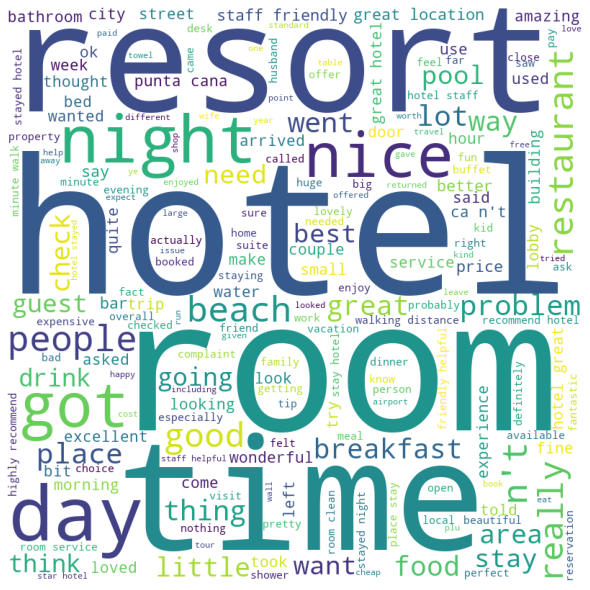

In [53]:

# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.Review: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [17]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3
df = df[df['Rating'] != 3]
df['sentiment'] = df['Rating'].apply(lambda rating : +1 if rating > 3 else -1)

In [19]:
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

In [25]:
# Product Scores
fig = px.histogram(df, x="sentiment")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='sentiment')
fig.show()